<a href="https://colab.research.google.com/github/shishiradk/pytorch-pratices/blob/main/03_Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pytorch  Computer Vision

## 0. Compuer vision libraries  in Pytorch

* `torchvision` - base domain library for Pytorch computer vision
* `torchvision.datasets`  - get  datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
*  `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for se with an ML model
* `torch.utils.data.Dataset`  - Base dataset class for Pytorch.
* `torch.utils.data.dataloader` - Creates a Python iterable over a dataset

In [31]:
# import Pytorch
import torch
from torch import nn

#import torchvision
import torchvision

from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib for visualization
print(torch.__version__)
print(torchvision.__version__)

2.9.0+cu126
0.24.0+cu126


##1. getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasetd

In [32]:
#setup  training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", #where to  download the data
    train=True, #do we want the training datasets?
    download = True,# do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(),# how  do we want to transform the data?
    target_transform=None# how do we want to transform the labels/target?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [33]:
len(train_data),len(test_data)

(60000, 10000)

In [34]:
#see the training example
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [35]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [36]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [37]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### Check the input and output of the data

In [38]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width ]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width ]
Image label: Ankle boot


## 1.2 Visualizing the data

Image shape: torch.Size([1, 28, 28]) 


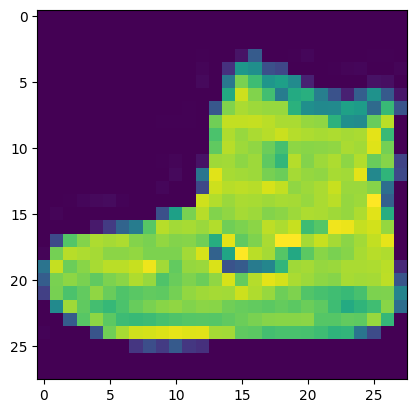

In [39]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape} ")
plt.imshow(image.squeeze())
# image

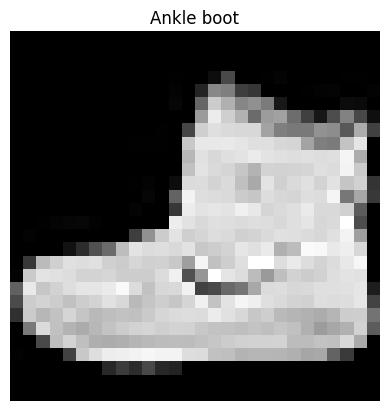

In [40]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

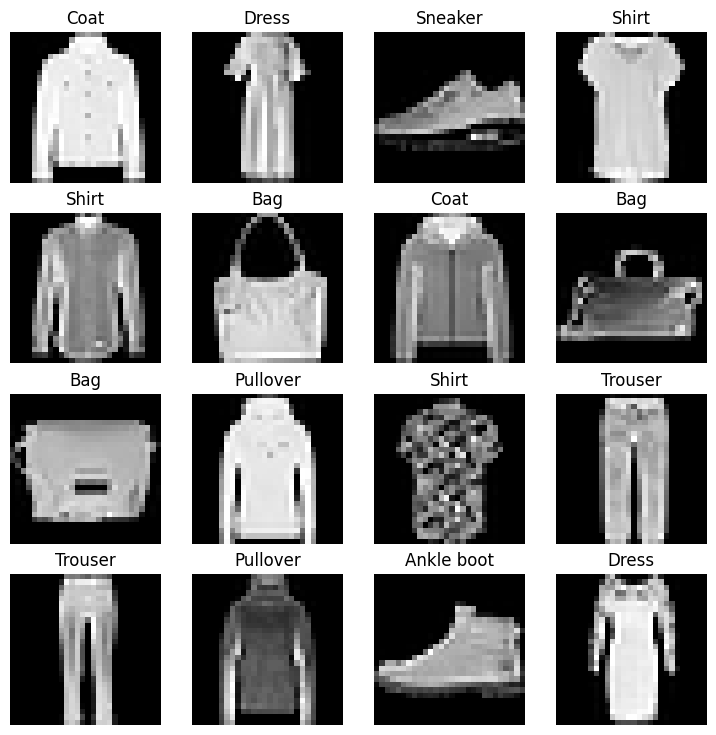

In [41]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  # print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

Do you think the items of clothing (images) could be pure linear lines? Or d you think we'll need non-lineariies?

## 2. Prepare DataLoader

Right now, our data is in the form of Pytorch dataset

DataLoader turns our dataset into aa Python iterable.

More specifically , we want  to turn our data into batches(or mini-batches



why would we do this?
1. It is computatonally efficient , as in your comuting hardware may not be able to look (store in memory) at 60000 images in one hit . SO we break it down to 32 images at a time (batch size of 32)
2. It gives or neural network more choices to update is gradients per epoch.




In [42]:
from torch.utils.data import DataLoader

#setup the batch size hyperparameter
BATCH_SIZE = 32

#Turn datsets into iterables(batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [43]:
# Lets check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"length of test dataloader: {len(test_dataloader)} batches od {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e04fa76e120>, <torch.utils.data.dataloader.DataLoader object at 0x7e04fa2d7aa0>)
length of train_dataloader: 1875 batches of 32...
length of test dataloader: 313 batches od 32...


In [44]:
#check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 2, label size: torch.Size([])


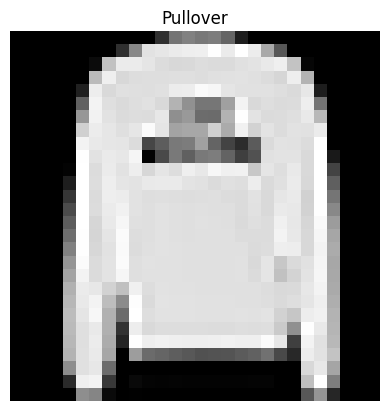

In [45]:
#SHOW  sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=(1,)).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3 . Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, is best practice to start with a baseline model.

A baseline model is a simple model you will try and improvr upon with subsequent models/experimentrs.

In other words:start simply and add complexity when necessary.

In [46]:
##Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x= train_features_batch[0]

# flatten the sample
output = flatten_model(x) #perform forward pass

#Print out what happened
print(f"Shape before flattening : {x.shape} -> [color_channels, height , width]")
print(f"Shape after flaattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening : torch.Size([1, 28, 28]) -> [color_channels, height , width]
Shape after flaattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [47]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0196, 0.0000, 0.1765, 0.8275, 0.9020, 0.9137, 0.9059, 0.9294,
         0.8078, 0.0000, 0.0000, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0196, 0.0000, 0.0000, 0.0000, 0.0667, 0.9490, 0.8745, 0.8627, 0.8588,
         0.9059, 0.9020, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
         0.0000, 0.0000, 0.0000, 0.0549, 0.4431, 0.8353, 0.9176, 0.8824, 0.8510,
         0.8510, 0.8902, 0.9216, 0.7961, 0.2431, 0.0000, 0.0000, 0.0000, 0.0039,
         0.0000, 0.0000, 0.0

In [48]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),

        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [53]:
torch.manual_seed(42)

#setup model with input parameters

model_0 = FashionMNISTModelV0(
    input_shape=28*28, # this is 28*28
    hidden_units=10,
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [54]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)